
# Informations sur l'étudiant:

* Nom: ANDRIANARAHINJAKA
* Prénom(s): Yohannee Aintsoa
* Classe: IGGLIA
* Numéro: .

# Analyse de données avec Régression Linéaire

## Jeu de données: California Housing (prix des logements en Californie)

Ce notebook présente un workflow complet d'analyse de données en utilisant un modèle de **régression linéaire** pour prédire le **prix médian des logements** en Californie à partir de caractéristiques géographiques et démographiques.

##1. Chargement et inspection des données


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Configuration graphique
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

print("Bibliothèques importées avec succès")

Bibliothèques importées avec succès


In [9]:
# Charger le jeu de données California Housing
housing = fetch_california_housing(as_frame=True)
df = housing.frame

print(f"Dimensions du dataset : {df.shape[0]} lignes × {df.shape[1]} colonnes")
print(f"\nVariable cible : MedHouseVal (valeur médiane du logement en centaines de milliers de $)")
print(f"\nDescription des variables :")
print("-" * 60)
descriptions = {
'MedInc': 'Revenu médian du quartier',
'HouseAge': 'Âge médian des logements',
'AveRooms': 'Nombre moyen de pièces par logement',
'AveBedrms': 'Nombre moyen de chambres par logement',
'Population': 'Population du quartier',
'AveOccup': 'Nombre moyen d\'occupants par logement',
'Latitude': 'Latitude géographique',
'Longitude': 'Longitude géographique',
'MedHouseVal': 'Prix médian du logement (cible)'
}
for col, desc in descriptions.items():
    print(f" {col:15s} → {desc}")

Dimensions du dataset : 20640 lignes × 9 colonnes

Variable cible : MedHouseVal (valeur médiane du logement en centaines de milliers de $)

Description des variables :
------------------------------------------------------------
 MedInc          → Revenu médian du quartier
 HouseAge        → Âge médian des logements
 AveRooms        → Nombre moyen de pièces par logement
 AveBedrms       → Nombre moyen de chambres par logement
 Population      → Population du quartier
 AveOccup        → Nombre moyen d'occupants par logement
 Latitude        → Latitude géographique
 Longitude       → Longitude géographique
 MedHouseVal     → Prix médian du logement (cible)


In [10]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [11]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [12]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


## 2. Nettoyage des données


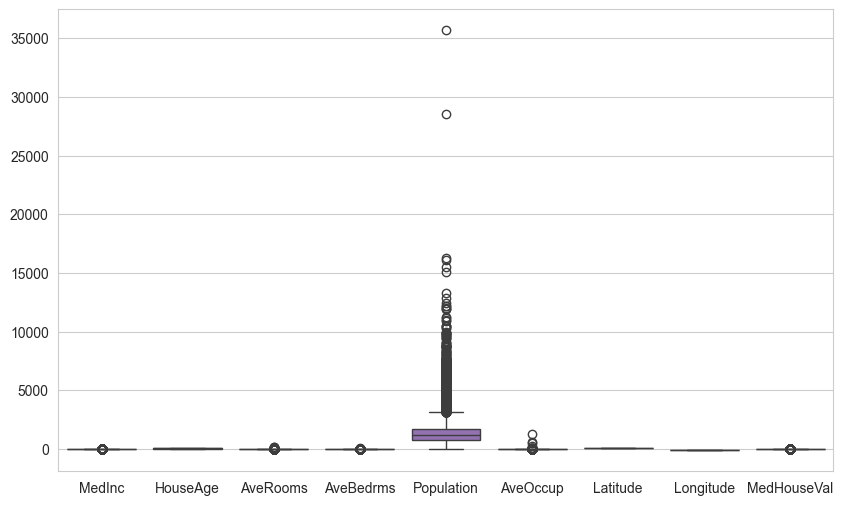

In [13]:
# Vérifier et supprimer les valeurs manquantes
if df.isnull().sum().any():
  df.dropna(inplace=True)
# Vérifier et supprimer les doublons
if df.duplicated().any():
  df.drop_duplicates(inplace=True)
# Détection des "outliers"
sns.boxplot(data=df)
plt.show()

In [15]:
# Filtrage des outliers extrêmes pour AverRooms, AveBedrms et AveOccup
df = df[(df['AveRooms'] < 50) & (df['AveBedrms'] < 10) & (df['AveOccup'] < 20)]


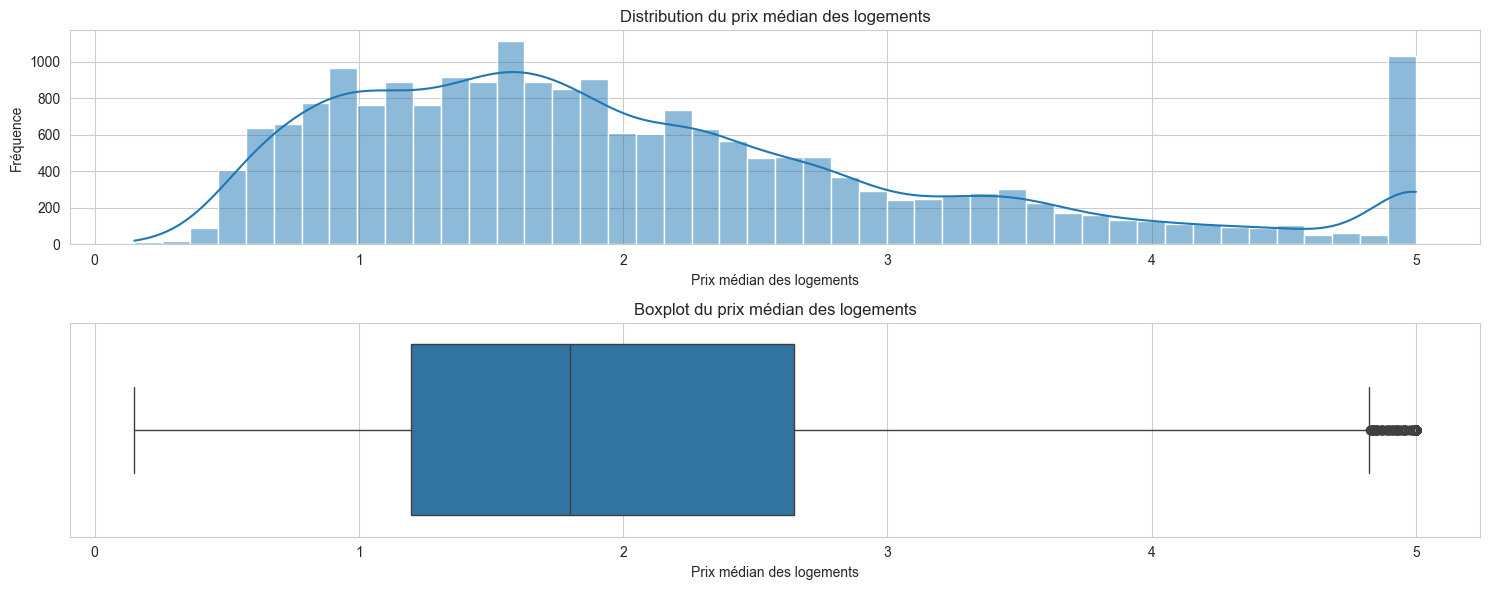

In [17]:
fig, axes = plt.subplots(2, 1, figsize=(15, 6))

#Histogramme
sns.histplot(data=df, x='MedHouseVal', kde=True, ax=axes[0])
axes[0].set_title('Distribution du prix médian des logements')
axes[0].set_xlabel('Prix médian des logements')
axes[0].set_ylabel('Fréquence')

#Boxplot
sns.boxplot(data=df, x='MedHouseVal', ax=axes[1])
axes[1].set_title('Boxplot du prix médian des logements')
axes[1].set_xlabel('Prix médian des logements')

plt.tight_layout()
plt.show()